# Transformation Features
Why Transformation of Features are Required?
1. Linear Regression -- Gradient Descent -- GLobal Minima
2. Algorithms like KNN, K-means, Hierarichal CLustering -- Eucledian Distance

Every point has some vectors and Directions

Deep Learning Techniques (Standardization, Scaling)

1. ANN --> Global Minima, Gradient
2. CNN
3. RNN

0-255 pixels

### Types of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

### Standardization (Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
df = df[['pclass', 'age', 'fare', 'survived']]

df.head(10)

# survived is output column

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
5,3,NaN,8.4583,0
6,1,54.0,51.8625,0
7,3,2.0,21.0750,0
8,3,27.0,11.1333,1
9,2,14.0,30.0708,1


In [2]:
# checking NA values 
df.isnull().sum()

pclass        0
age         177
fare          0
survived      0
dtype: int64

In [3]:
mean_age = df['age'].mean().round()

df['age'].fillna(value = mean_age, inplace = True)

'''
using median with another method

df['age'].fillna(df.age.median(), inplace = True)
'''


"\nusing median with another method\n\ndf['age'].fillna(df.age.median(), inplace = True)\n"

In [4]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [5]:
# Independent and dependent features
X = df.iloc[:,[0,1,2]]     # from column 1 till end
y = df.iloc[:,3]      # selecting column 0

X

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,30.0,23.4500
889,1,26.0,30.0000


In [6]:
# train test split -> we do this to avoid overfitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [7]:
#### standardization: we use the standardscaler from sklearn Library
from sklearn.preprocessing import StandardScaler

# initializing an object for the function StandardScaler
scaler = StandardScaler()

# fit and then transform to X_train data
X_train_scaled = scaler.fit_transform(X_train)

'''
fit      --> calculate mean, standard deviation of all the features separately
tranform --> tranform the data using above calculated values

for train data we will find apply both process i.e. fit and then tranform
for test data, we will use above finded fit values to tranform the data
'''

X_train_scaled

array([[-1.62580285,  1.88479023,  0.38784185],
       [ 0.80576177,  0.02939014, -0.31908053],
       [-0.41002054, -0.35715155,  0.18792449],
       ...,
       [ 0.80576177,  0.87978185, -0.34613654],
       [-1.62580285, -1.20754325,  1.71250117],
       [-1.62580285, -0.66638489,  0.8821286 ]])

In [8]:
### standardizing test data
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 0.80576177,  0.02939014, -0.32402243],
       [-0.41002054,  0.10669848, -0.4162854 ],
       [ 0.80576177, -0.74369323, -0.46634591],
       [-0.41002054, -1.82600995,  0.0211365 ],
       [ 0.80576177, -1.20754325, -0.40186603],
       [-1.62580285, -0.27984321,  0.91250512],
       [ 0.80576177,  0.02939014, -0.46974808],
       [ 0.80576177, -1.05292658, -0.2704781 ],
       [ 0.80576177, -1.05292658, -0.46974808],
       [-1.62580285, -0.82100157, -0.10944269],
       [-1.62580285,  0.5705485 ,  0.41190006],
       [ 0.80576177,  1.11170686, -0.46391578],
       [ 0.80576177,  0.02939014, -0.12531819],
       [ 0.80576177,  0.02939014, -0.47995459],
       [-0.41002054,  0.49324016, -0.36768297],
       [-1.62580285, -1.05292658,  0.14555873],
       [-1.62580285,  0.95709018,  0.40128918],
       [ 0.80576177,  0.02939014, -0.46820835],
       [-0.41002054, -0.20253487, -0.36768297],
       [-1.62580285,  1.34363187,  0.39051499],
       [ 0.80576177, -0.43445988, -0.466

In [9]:
### Model Building
## fit() for training and predict for test

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression()


In [10]:
classification.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
df_scaled= scaler.fit_transform(df)
df_scaled

array([[ 0.82737724, -0.59705478, -0.50244517, -0.78927234],
       [-1.56610693,  0.63416229,  0.78684529,  1.2669898 ],
       [ 0.82737724, -0.28925051, -0.48885426,  1.2669898 ],
       ...,
       [ 0.82737724,  0.01855376, -0.17626324, -0.78927234],
       [-1.56610693, -0.28925051, -0.04438104,  1.2669898 ],
       [ 0.82737724,  0.17245589, -0.49237783, -0.78927234]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

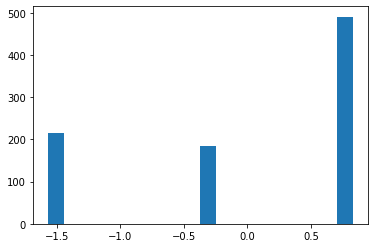

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df_scaled[:,0], bins = 20)

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.25765881, -1.95147051, -1.64528222, -1.33909392, -1.03290562,
        -0.72671733, -0.42052903, -0.11434074,  0.19184756,  0.49803586,
         0.80422415,  1.11041245,  1.41660074,  1.72278904,  2.02897734,
         2.33516563,  2.64135393,  2.94754223,  3.25373052,  3.55991882,
         3.86610711]),
 <BarContainer object of 20 artists>)

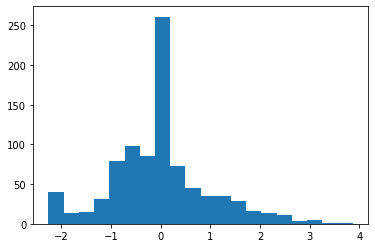

In [14]:
plt.hist(df_scaled[:,1], bins= 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

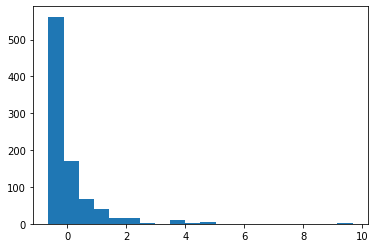

In [15]:
plt.hist(df_scaled[:,2], bins = 20)

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


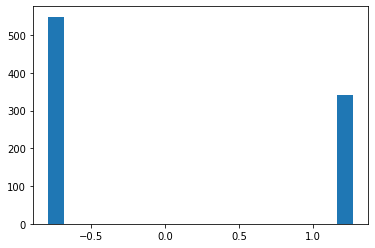

In [16]:
plt.hist(df_scaled[:,3], bins = 20)

df.head()

#### Min Max Scaling
- used in CNN, a deep learning technique
- Min Max Scaling scales the values between 0 to 1. X_scaled = (X-X.min/X.max - X.min)
- the reason it is used in CNN is because every pixel lies in range 0-255 and using this, it can be converted to 0-1 range

In [17]:
# from sklearn.preprocessing import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# importing the library 
from sklearn.preprocessing import MinMaxScaler

# creating an object of the function
min_max = MinMaxScaler()

'''
the range can be varied by giving feture_range values like 0 to 8 or some other values as desired

min_max = MinMaxScaler(feature_range=(0,8))
'''

# applying min-max scaling
df_minmax = pd.DataFrame(min_max.fit_transform(X_train), columns= ['pclass', 'age', 'fare'])

df_minmax.head(5)




,pclass,age,fare
0,0.0,0.673285,0.101229
1,1.0,0.371701,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


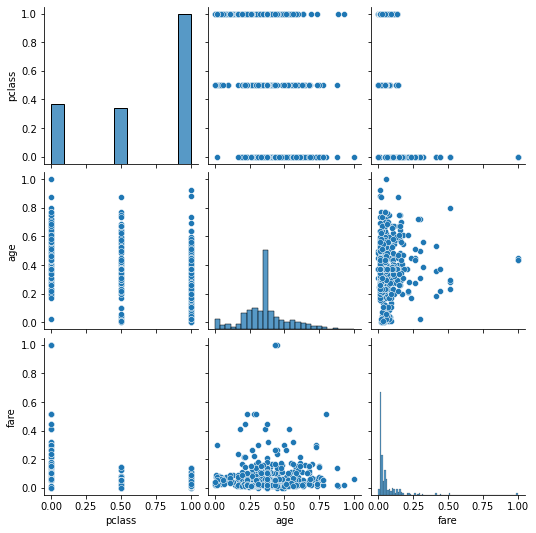

In [19]:
sns.pairplot(df_minmax)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

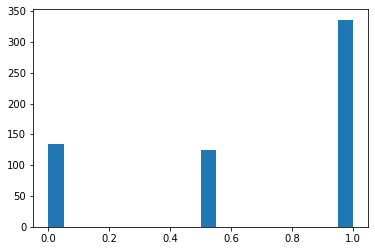

In [20]:
plt.hist(df_minmax['pclass'], bins = 20)

(array([ 29.,   9.,   9.,  23.,  50.,  63.,  62., 174.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

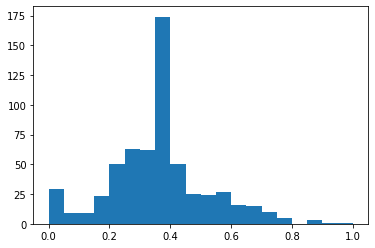

In [21]:
plt.hist(df_minmax['age'], bins = 20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

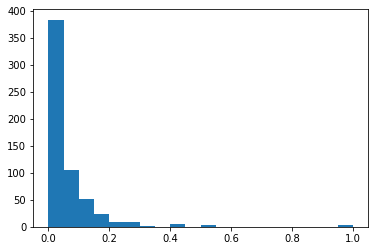

In [22]:
plt.hist(df_minmax['fare'], bins = 20)

#### Robust Scaler
Robust Scaler are robust to outliers. It is used to scale features to median and quantiles. Scaling using median and quartiles consists of substracting the median to all the observations, and then diciding by the interquartile difference. The interquartile differences is the difference between the 75th and 25th quantile:

- IQR = 75th quantile - 25th quantile
- X_scaled = (X-X.median)/IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# importing the library
from sklearn.preprocessing import RobustScaler

# initializing the function RobustScaler to an object
scaler = RobustScaler()

#
df_robust_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns= ['pclass', 'age', 'fare'])

df_robust_scaler.head()


,pclass,age,fare
0,-2.0,1.846154,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.384615,1.161670
3,0.0,-0.307692,0.000000
4,0.0,-0.615385,-0.168630


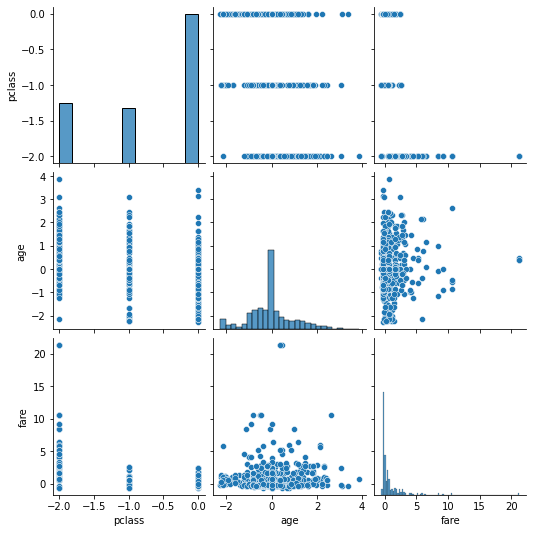

In [25]:
sns.pairplot(df_robust_scaler)

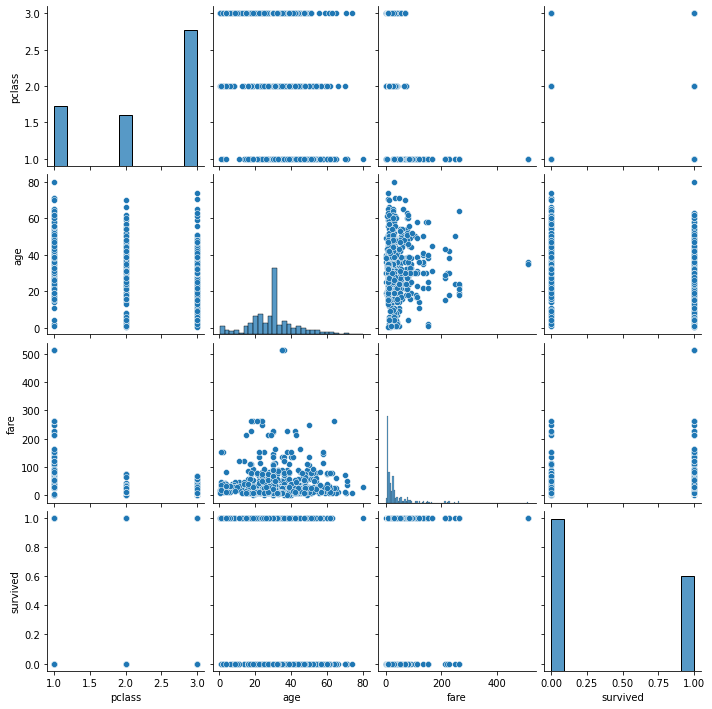

In [26]:
sns.pairplot(df)

(array([ 29.,   9.,   9.,  23.,  50.,  63.,  62., 174.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([-2.27538462, -1.96930769, -1.66323077, -1.35715385, -1.05107692,
        -0.745     , -0.43892308, -0.13284615,  0.17323077,  0.47930769,
         0.78538462,  1.09146154,  1.39753846,  1.70361538,  2.00969231,
         2.31576923,  2.62184615,  2.92792308,  3.234     ,  3.54007692,
         3.84615385]),
 <BarContainer object of 20 artists>)

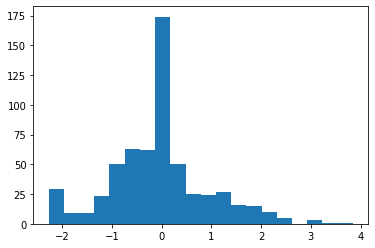

In [27]:
plt.hist(df_robust_scaler['age'], bins = 20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61902355,  0.47804111,  1.57510578,  2.67217045,  3.76923512,
         4.86629979,  5.96336445,  7.06042912,  8.15749379,  9.25455846,
        10.35162313, 11.44868779, 12.54575246, 13.64281713, 14.7398818 ,
        15.83694647, 16.93401113, 18.0310758 , 19.12814047, 20.22520514,
        21.32226981]),
 <BarContainer object of 20 artists>)

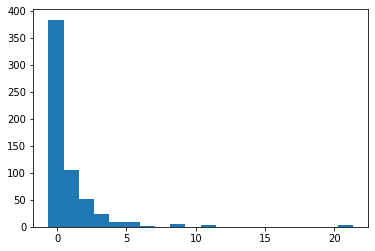

In [28]:
plt.hist(df_robust_scaler['fare'], bins = 20)

#### Gaussian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed 
- Accuracy 
- Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more generally, we can use any exponent)
5. boxcox tranformation

In [34]:
df1 = sns.load_dataset('titanic')
df1 = df1[['age', 'fare', 'survived']]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   fare      891 non-null    float64
 2   survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [35]:
# check na values
df1.isnull().sum()

# fill na values with median
median_age = df1['age'].median()

df1['age'].fillna(value = median_age, inplace = True)


In [36]:
# check na values
df1.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [67]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [77]:
# if we want to check the feature is guassian or normal distribution, we use Q-Q plot

# creating a function to generate plot

def plot_data(df1,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df1[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df1[feature],dist='norm',plot=pylab)
    plt.show()

'''
Q-Q plot says that most of the data should lie on the line for a feature to be a gaussian tranformation
'''

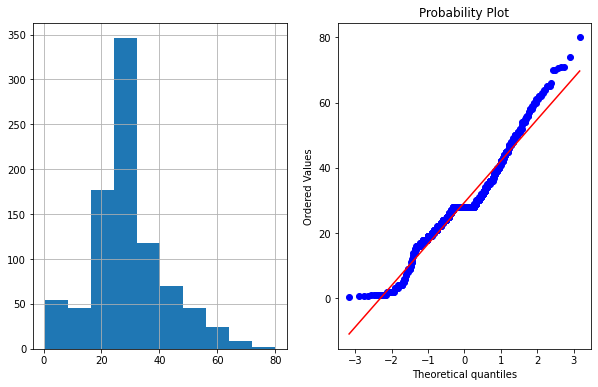

In [78]:
plot_data(df1, 'age')

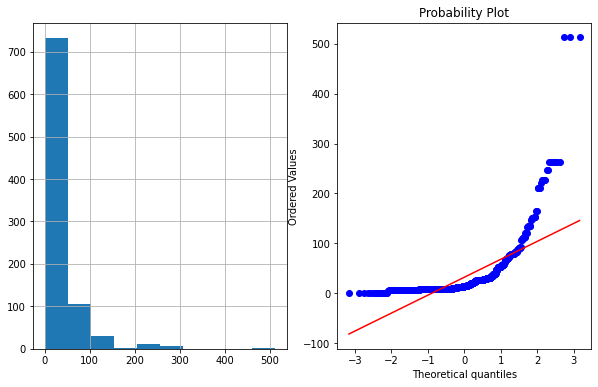

In [79]:
plot_data(df1, 'fare')

#### Logarithmic Tranformation

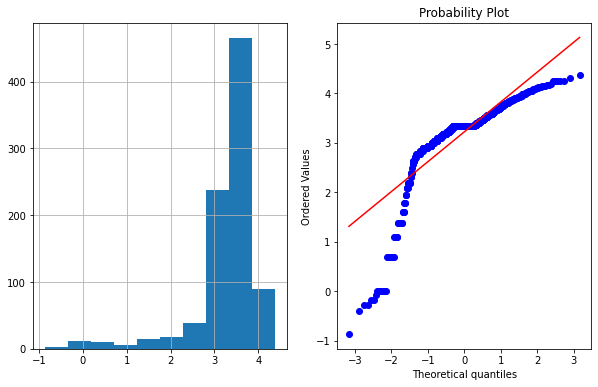

In [80]:
import numpy as np
df1['age_log'] = np.log(df1['age'])
plot_data(df1, 'age_log')


#### Reciprocal Tranformation

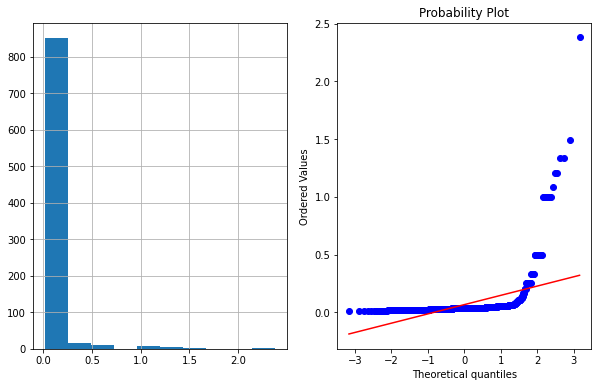

In [82]:
df1['age_reciprocal'] = 1/df1.age
plot_data(df1, 'age_reciprocal')

#### Square root transformation

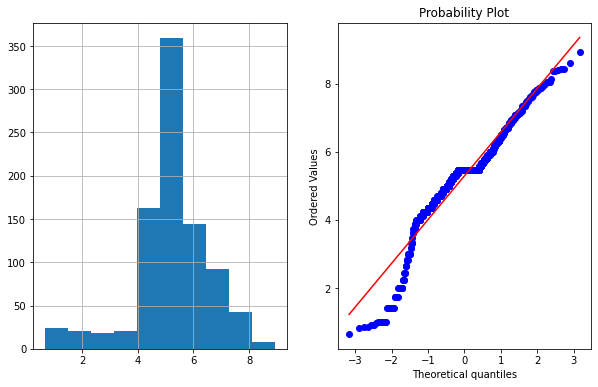

In [83]:
df1['age_square_root'] = df.age**(1/2)
plot_data(df1, 'age_square_root')

#### Exponential Tranformation

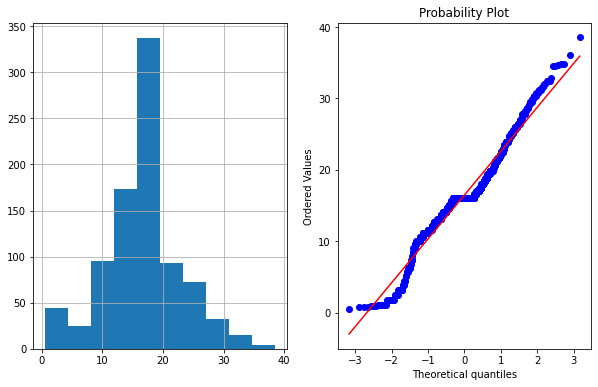

In [84]:
df1['age_exponential'] = df1.age**(1/1.2)
plot_data(df1, 'age_exponential')

#### BoxCox tranformation
The BoxCox tranformation is defined as:
- T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the tranformation parameter. λ varies from -5 to 5. In the tranformation, all the values of λ are considered and the optimal value for a given variable is selected.


In [97]:
df1['age_boxCox'], parameters = stat.boxcox(df1['age'])
print(parameters)

'''
stat.boxcox compltes the lambda value (λ)
'''

0.7964531473656952


'\nstat.boxcox compltes the lambda value (λ)\n'

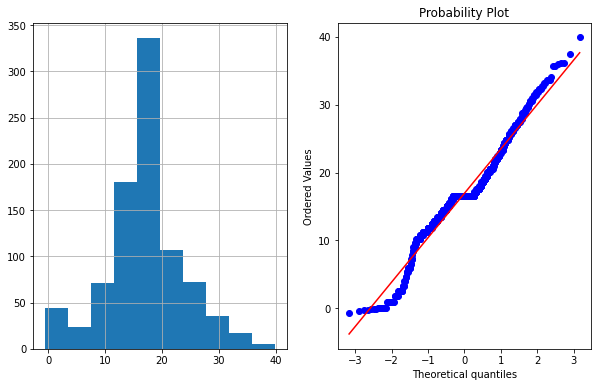

In [98]:
plot_data(df1, 'age_boxCox')

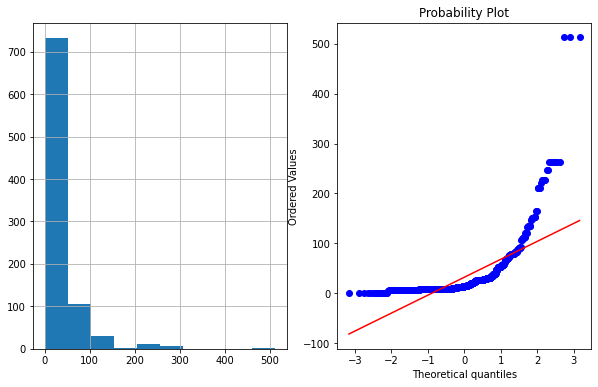

In [99]:
plot_data(df1, 'fare')

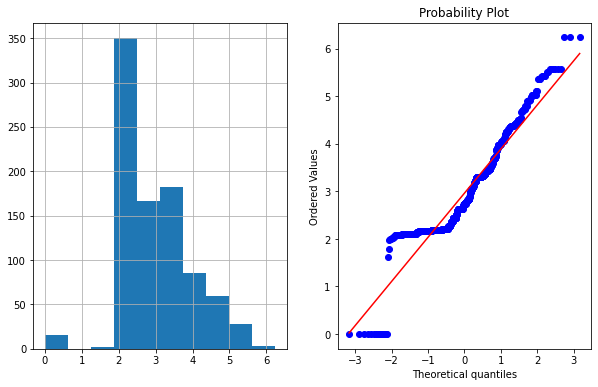

In [100]:
df1['fare_log'] = np.log1p(df1['fare'])
plot_data(df1, 'fare_log')

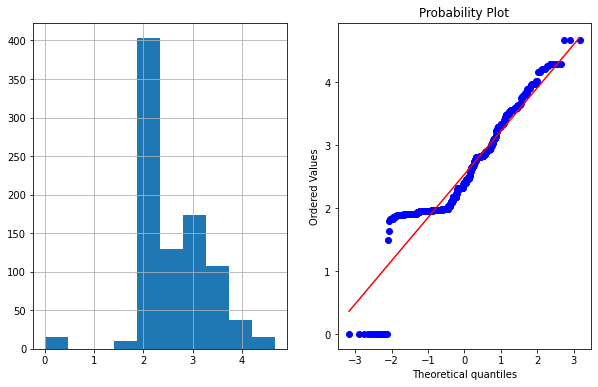

In [101]:
df1['fare_boxCox'], parameters = stat.boxcox(df1['fare']+1)

plot_data(df1, 'fare_boxCox')
